- 数据预处理
    - 归一化 Normalization
    - PCA降维和白化   

- 权重初始化
- 批量归一化 Batch Normalization
- 正则化 
    
    - L1, L2正则化
    - Dropout and 反向 Dropout
- 属性分类:一个样本有多个标签
- 偏差和方差 bias and variance

### 1. 数据预处理

对原始数据进行预处理:

**均值减法（Mean subtraction）**
```python
### 对数据每个维度减去平均值
X -= np.mean(X, axis = 0)
### 对图像的话,是所有的维度减去一个平均值
X -= np.mean(X)
```

**归一化（Normalization）**
是指将数据的所有维度都归一化，使其数值范围都近似相等。
先做零中心化,然后每个维度除以标准差.
```python
X /= np.std(X, axis = 0)
```

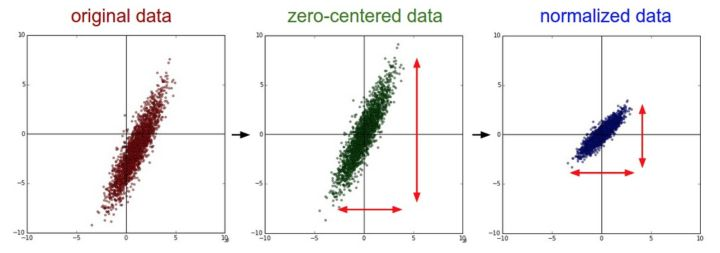

----------------------------------
#### PCA和白化

PCA: 统计分析和机器学习里面常用的降维算法~~主成分分析 

**为什么要降维??**

feature太多会造成模型复杂，训练速度过慢，因此我们引入降维。 

About Visualization： 
多维数据很难进行可视化分析，因此我们需要降维分析。



**PCA的数学原理**
http://blog.codinglabs.org/articles/pca-tutorial.html

总结下就是:

1)输入数据是(m,n),即n个样本,m维特征.可以看作是m个特征向量

2) PCA就是将m维特征向量转换到k(k<m)维的向量上来
- 降维当然意味着信息的丢失，不过鉴于实际数据本身常常存在的相关性，我们可以想办法在降维的同时将信息的损失尽量降低.
- 我们到底删除哪一列损失的信息才最小？亦或根本不是单纯删除几列，而是通过某些变换将原始数据变为更少的列但又使得丢失的信息最小？到底如何度量丢失信息的多少？如何根据原始数据决定具体的降维操作步骤？
        
3) 先理解下向量和基向量的数学概念
- 我们通常所说的向量忽略了其单位正交基的,以其中一个样本为例,(这里样本看作列向量),$(32,41,52)^T$,实际上是$32(1,0,0)+42(0,1,0)+52(0,0,1)$. 
    $$\begin{pmatrix}
  p_1 \\
  p_2 \\
  \vdots \\
  p_R
\end{pmatrix}
\begin{pmatrix}
  a_1 & a_2 & \cdots & a_n
\end{pmatrix}
=
\begin{pmatrix}
  p_1a_1 & p_1a_2 & \cdots & p_1a_n \\
  p_2a_1 & p_2a_2 & \cdots & p_2a_n \\
  \vdots  & \vdots  & \ddots & \vdots \\
  p_Ra_1 & p_Ra_2 & \cdots & p_Ra_n
\end{pmatrix}$$
    $p_i$是行向量,表示基向量中第i个向量,$a_j$是一个列向量,表示第j个样本.
    
4) 降低特征数量就是减少单位基向量,新的基向量可以不一定是正交基,新的基向量个数之后再说~而是尽量让原始数据转换到基向量上之后保存的信息最多!
    
- **怎么才是保存最大的信息呢?**
- 一种直观的看法是：希望投影后的投影值尽可能分散。数学上表征离散程度,可以用方差~~也就是找出一个基向量,使得原始数据向量投影到它上面之后,方差最大~  
$$Var(a)=\frac{1}{n}\sum_{i=1}^n{(a_i-\mu)^2}$$
$$Var(a)=\frac{1}{n}\sum_{i=1}^n{a_i^2}$$        
- 找到了一个基,怎么确定第二个,第三个...显然如果还是以方差最大为目标,那么第二个基和第一个基几乎重合了吧.那么他们得到的信息其实是一样的~~所以应该尽量让第二个基和第一个基相关系越小越好~~~怎么数学上表征两个向量相关系小呢,就是他们内积得到的结果很小呀~~

$$Cov(a,b)=\frac{1}{n}\sum_{i=1}^n{a_ib_i}$$
        
5) 很巧的是,对于原始数据X,其协防差矩阵可以表示它信息量的多少~
$$X=\begin{pmatrix}
  a_1 & a_2 & \cdots & a_n \\
  b_1 & b_2 & \cdots & b_n
\end{pmatrix}$$  
$假设只有2维特征,(a_1,b_1)表示一个样本,总共有n个样本$
$$C=\frac{1}{n}XX^\mathsf{T}=\begin{pmatrix}
  \frac{1}{n}\sum_{i=1}^n{a_i^2}   & \frac{1}{n}\sum_{i=1}^n{a_ib_i} \\
  \frac{1}{n}\sum_{i=1}^n{a_ib_i} & \frac{1}{n}\sum_{i=1}^n{b_i^2}
\end{pmatrix}$$
$对角线元素表示n个样本下,某个特征的方差,非对角线元素表示不同特征之间的协方差$

6) 那么我们的目标就很明确了~~协防差矩阵对角化,这可是线代里面考烂了的..
$$\begin{array}{l l l}
  D & = & \frac{1}{m}YY^\mathsf{T} \\
    & = & \frac{1}{m}(PX)(PX)^\mathsf{T} \\
    & = & \frac{1}{m}PXX^\mathsf{T}P^\mathsf{T} \\
    & = & P(\frac{1}{m}XX^\mathsf{T})P^\mathsf{T} \\
    & = & PCP^\mathsf{T}
\end{array}$$

找到一组基使得矩阵D的非对角线元素为0,对角线元素前k个,也就是我们要找的主成份了~~~
那么P的前k行就是我们要找到新的基~~~$P^{k*m}$
$PX^{k*n}$就是我们要得到的降维之后的数据,k维特征~~

7) 算法实现就比较简单了... 需要注意的是,前面讲数学原理的时候样本是行向量,在下面python代码实现是列向量

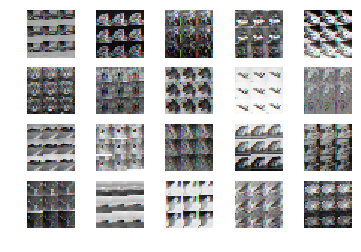

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
### 输入数据是[N,D] 
file = "/home/panxie/文档/cs231n/assignment1/cs231n/datasets/cifar-10-batches-py/data_batch_2"
with open(file,'rb') as f:
    datadict = pickle.load(f, encoding='latin1')
X = datadict['data'][:20,].reshape(-1,32,32,3)
for i in range(X.shape[0]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X[i].astype('uint8'))
    plt.axis('off')
plt.show()

In [78]:
## 预处理
X = X.reshape(X.shape[0],-1).astype(np.float64)
X -= np.mean(X,axis=0)
cov = np.dot(X.T, X) / X.shape[0]  # 得到数据的协方差矩阵 (15,15)
## 奇异值分解
## linalg = linear + algebra 
U,S,V = np.linalg.svd(cov)   
print(U.shape,S.shape,V.shape)

(3072, 3072) (3072,) (3072, 3072)


SVD为奇异值分解（singular value decomposition），在numpy库中有函数[U,S,V] = linalg.svd(A) 返回一个数组S（由Σ的奇异值组成），两个酉矩阵U和V，且满足A= U*S* V。若A为m×n阵，则U为m×m阵，V为n×n阵。奇异值在S的对角线上，非负且按降序排列。(奇异值等于sqrt(特征值))
U的列是标准正交向量的集合（范式为1，列之间标准正交），所以可以把它们看做标准正交基向量。

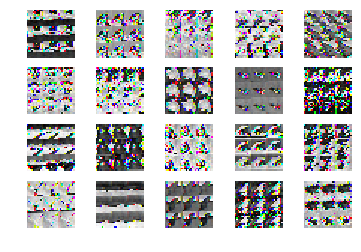

In [79]:
Xrot = np.dot(X,U) # 对数据去相关性
Xrot_reduced = Xrot[:,:144]    ## 降到144维
Xrot_reduced = Xrot_reduced.dot(U.T[:144,]).reshape(20,32,32,3)  # 将降维后的数据还原到3072维特征向量
for i in range(Xrot_reduced.shape[0]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(Xrot_reduced[i].astype('uint8'))
    plt.axis('off')
plt.show()

可以看到图片模糊了很多..但大部分特征还是保留下来了的.通常使用PCA降维过的数据训练线性分类器和神经网络会达到非常好的性能效果，同时还能节省时间和存储器空间。

### 白化
最后一个在实践中会看见的变换是白化（whitening）。白化操作的输入是特征基准上的数据，然后对每个维度除以其特征值来对数值范围进行归一化。该变换的几何解释是：如果数据服从多变量的高斯分布，那么经过白化后，数据的分布将会是一个均值为零，且协方差相等的矩阵。该操作的代码如下：

In [80]:
Xwhite = Xrot / np.sqrt(S + 1e-5)

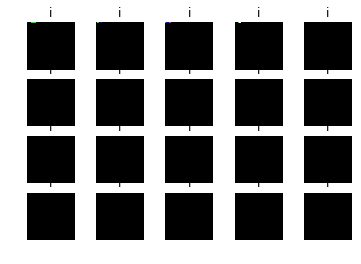

In [81]:
Xwhite = Xwhite.reshape(X.shape[0],32,32,3)
for i in range(Xwhite.shape[0]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(Xwhite[i].astype('uint8'))
    plt.axis('off')
    plt.title('i')
plt.show()

#### 总结: 

1. 对图像的数据预处理并不会用到PCA和白化, 其他数据分析可能会用到.
2. 对图像的话去均值很重要,归一化因为图像的像素都在-255-255之间,因此也不必要. 需要注意的是,均值是训练集的平均值,在验证集和测试集也都是减去训练集的平均值.

### 2. 权重初始化

#### 小随机数初始化.

**2.1 为什么要用零均值来初始化?**

如果数据经过了恰当的归一化的话，就可以假设所有权重数值中大约一半为正数，一半为负数,均值为0就是很合理的猜想. 但并不是小数值一定会得到好的结果。例如，一个神经网络的层中的权重值很小，那么在反向传播的时候就会计算出非常小的梯度（因为梯度与权重值是成比例的）。这就会很大程度上减小反向传播中的“梯度信号”，在深度网络中，就会出现问题。

**2.2 使用1/sqrt(n)校准方差。**

随着输入数据量的增长，随机初始化的神经元的输出数据的分布中的方差也在增大。我们可以除以输入数据量的平方根来调整其数值范围，这样神经元输出的方差就归一化到1了。也就是说，建议将神经元的权重向量初始化为：w = np.random.randn(n) / sqrt(n)。
<font color=red size=4>不懂不懂!!1</font>

该主题下的目前研究:
 
1.  Glorot等在论文[Understanding the difficulty of training deep feedforward neural networks](http://link.zhihu.com/?target=http%3A//jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf)中作出了类似的分析。在论文中，作者推荐初始化公式为 $\text{Var}(w) = 2/(n_{in} + n_{out})$ ，其中$(n_{in}, n_{out})$是在前一层和后一层中单元的个数。这是基于妥协和对反向传播中梯度的分析得出的结论。

2.  该主题下最新的一篇论文是：[Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](http://link.zhihu.com/?target=http%3A//arxiv-web3.library.cornell.edu/abs/1502.01852)，作者是He等人。文中给出了一种针对ReLU神经元的特殊初始化，并给出结论：网络中神经元的方差应该是2.0/n。代码为w = np.random.randn(n) * sqrt(2.0/n)。


#### 2.3 稀疏初始化
稀疏初始化（Sparse initialization）。另一个处理非标定方差的方法是将所有权重矩阵设为0，但是为了打破对称性，每个神经元都同下一层固定数目的神经元随机连接（其权重数值由一个小的高斯分布生成）。一个比较典型的连接数目是10个。

### 3. 批量归一化 batch normalization  
论文[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)

批量归一化是loffe和Szegedy最近才提出的方法，该方法减轻了如何合理初始化神经网络这个棘手问题带来的头痛：），其做法是让激活数据在训练开始前通过一个网络，网络处理数据使其服从标准高斯分布。因为归一化是一个简单可求导的操作，所以上述思路是可行的。在实现层面，**应用这个技巧通常意味着全连接层（或者是卷积层，后续会讲）与激活函数之间添加一个BatchNorm层**。

具体来说，在卷积操作或者全连接层之后，但是在激活层之前加上 BN 层，会有下面的几个效果和好处，

- 减少坏初始化的影响
- 加快模型的收敛速度
- 可以用大些的学习率
- 能有效地防止过拟合

BN的看起来很简单,但真正理解起来还比较困难,需要单独花时间去深入了解~

### 4. 正则化

#### 4.1 L2正则化  
L2正则化可以直观理解为它对于大数值的权重向量进行严厉惩罚，倾向于更加分散的权重向量. 使网络更倾向于使用所有输入特征，而不是严重依赖输入特征中某些小部分特征。最后需要注意在梯度下降和参数更新的时候，使用L2正则化意味着所有的权重都以$w += -\lambda * W$向着0线性下降。

#### 4.2 L1正则化
对于每个w我们都向目标函数增加一个$\lambda|w|$。L1和L2正则化也可以进行组合：$\lambda_1|w|+\lambda_2w^2$，这也被称作Elastic net regularizaton。L1正则化有一个有趣的性质，它会让权重向量在最优化的过程中变得稀疏（即非常接近0）。也就是说，使用L1正则化的神经元最后使用的是它们最重要的输入数据的稀疏子集，同时对于噪音输入则几乎是不变的了。相较L1正则化，L2正则化中的权重向量大多是分散的小数字。

#### 4.3 最大范式约束（Max norm constraints）。
另一种形式的正则化是给每个神经元中权重向量的量级设定上限，并使用投影梯度下降来确保这一约束。在实践中，与之对应的是参数更新方式不变，然后要求神经元中的权重向量$\overrightarrow{w}$必须满足$||\overrightarrow{w}||_2<c$这一条件，一般c值为3或者4。有研究者发文称在使用这种正则化方法时效果更好。这种正则化还有一个良好的性质，即使在学习率设置过高的时候，网络中也不会出现数值“爆炸”，这是因为它的参数更新始终是被限制着的。

#### 4.4 随机失活（Dropout）
是一个简单又极其有效的正则化方法。该方法由Srivastava在论文[Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://link.zhihu.com/?target=http%3A//www.cs.toronto.edu/%257Ersalakhu/papers/srivastava14a.pdf)中提出的，与L1正则化，L2正则化和最大范式约束等方法互为补充。在训练的时候，随机失活的实现方法是让神经元以超参数p的概率被激活或者被设置为0。

<img src = "https://pic3.zhimg.com/80/63fcf4cc655cb04f21a37e86aca333cf_hd.jpg" height = 500 weight = 500>

在训练过程中，随机失活可以被认为是对完整的神经网络抽样出一些子集，每次基于输入数据只更新子网络的参数（然而，数量巨大的子网络们并不是相互独立的，因为它们都共享参数）。在测试过程中不使用随机失活，可以理解为是对数量巨大的子网络们做了模型集成（model ensemble），以此来计算出一个平均的预测。


python代码:
```python
""" 普通版随机失活: 不推荐实现 (看下面笔记) """

p = 0.5 # 激活神经元的概率. p值更高 = 随机失活更弱

def train_step(X):
  """ X中是输入数据 """
  
  # 3层neural network的前向传播
  H1 = np.maximum(0, np.dot(W1, X) + b1)
  U1 = np.random.rand(*H1.shape) < p # 第一个随机失活遮罩,rand() [0,1)的随机数
  H1 *= U1 # drop!
  H2 = np.maximum(0, np.dot(W2, H1) + b2)
  U2 = np.random.rand(*H2.shape) < p # 第二个随机失活遮罩
  H2 *= U2 # drop!
  out = np.dot(W3, H2) + b3
  
  # 反向传播:计算梯度... (略)
  # 进行参数更新... (略)
  
def predict(X):
  # 前向传播时模型集成
  H1 = np.maximum(0, np.dot(W1, X) + b1) * p # 注意：激活数据要乘以p
  H2 = np.maximum(0, np.dot(W2, H1) + b2) * p # 注意：激活数据要乘以p
  out = np.dot(W3, H2) + b3
```

在上面的代码中，train_step函数在第一个隐层和第二个隐层上进行了两次随机失活。在输入层上面进行随机失活也是可以的，为此需要为输入数据X创建一个二值的遮罩。反向传播保持不变，但是肯定需要将遮罩U1和U2加入进去。

注意：在predict函数中不进行随机失活，但是对于两个隐层的输出都要乘以p，调整其数值范围。这一点非常重要，因为在测试时所有的神经元都能看见它们的输入，因此我们想要神经元的输出与训练时的预期输出是一致的。以p=0.5为例，在测试时神经元必须把它们的输出减半，这是因为在训练的时候它们的输出只有一半。为了理解这点，先假设有一个神经元x的输出，那么进行随机失活的时候，该神经元的输出就是px+(1-p)0，这是有1-p的概率神经元的输出为0。在测试时神经元总是激活的，就必须调整x\to px来保持同样的预期输出。在测试时会在所有可能的二值遮罩（也就是数量庞大的所有子网络）中迭代并计算它们的协作预测，进行这种减弱的操作也可以认为是与之相关的。
<font color=red size=4>不是很理解这部分?为啥predict不随机失活???</font>

In [100]:
import numpy as np
p = 0.5  # 激活神经元的概率. p值更高 = 随机失活更弱
a = np.array([[-1,1,-2],[2,-3,-4]])
b = np.random.rand(*a.shape) < p
a *= b ##drop
print(b)
print(a * b)

[[False  True  True]
 [ True  True False]]
[[ 0  1 -2]
 [ 2 -3  0]]


#### 4.5  反向随机失活
它是在训练时就进行数值范围调整，从而让前向传播在测试时保持不变。这样做还有一个好处，无论你决定是否使用随机失活，预测方法的代码可以保持不变。反向随机失活的代码如下：
```python
""" 
反向随机失活: 推荐实现方式.
在训练的时候drop和调整数值范围，测试时不做任何事.
"""

p = 0.5 # 激活神经元的概率. p值更高 = 随机失活更弱

def train_step(X):
  # 3层neural network的前向传播
  H1 = np.maximum(0, np.dot(W1, X) + b1)
  U1 = (np.random.rand(*H1.shape) < p) / p # 第一个随机失活遮罩. 注意/p!
  H1 *= U1 # drop!
  H2 = np.maximum(0, np.dot(W2, H1) + b2)
  U2 = (np.random.rand(*H2.shape) < p) / p # 第二个随机失活遮罩. 注意/p!
  H2 *= U2 # drop!
  out = np.dot(W3, H2) + b3

  # 反向传播:计算梯度... (略)
  # 进行参数更新... (略)

def predict(X):
  # 前向传播时模型集成
  H1 = np.maximum(0, np.dot(W1, X) + b1) # 不用数值范围调整了
  H2 = np.maximum(0, np.dot(W2, H1) + b2)
  out = np.dot(W3, H2) + b3
```

在随机失活发布后，很快有大量研究为什么它的实践效果如此之好，以及它和其他正则化方法之间的关系。如果你感兴趣，可以看看这些文献：

[Dropout paper](http://link.zhihu.com/?target=http%3A//www.cs.toronto.edu/%257Ersalakhu/papers/srivastava14a.pdf) by Srivastava et al. 2014.

[Dropout Training as Adaptive Regularization](http://link.zhihu.com/?target=http%3A//papers.nips.cc/paper/4882-dropout-training-as-adaptive-regularization.pdf)：“我们认为：在使用费希尔信息矩阵（[fisher information matrix](http://link.zhihu.com/?target=https%3A//en.wikipedia.org/wiki/Fisher_information_metric)）的对角逆矩阵的期望对特征进行数值范围调整后，再进行L2正则化这一操作，与随机失活正则化是一阶相等的。”

### 前向传播中的噪音。
在更一般化的分类上，随机失活属于网络在前向传播中有随机行为的方法。测试时，通过分析法（在使用随机失活的本例中就是乘以p）或数值法（例如通过抽样出很多子网络，随机选择不同子网络进行前向传播，最后对它们取平均）将噪音边缘化。在这个方向上的另一个研究是DropConnect，它在前向传播的时候，一系列权重被随机设置为0。提前说一下，卷积神经网络同样会吸取这类方法的优点，比如随机汇合（stochastic pooling），分级汇合（fractional pooling），数据增长（data augmentation）。我们在后面会详细介绍。

#### 偏置正则化。
在线性分类器的章节中介绍过，对于偏置参数的正则化并不常见，因为它们在矩阵乘法中和输入数据并不产生互动，所以并不需要控制其在数据维度上的效果。然而在实际应用中（使用了合理数据预处理的情况下），对偏置进行正则化也很少会导致算法性能变差。这可能是因为相较于权重参数，偏置参数实在太少，所以分类器需要它们来获得一个很好的数据损失，那么还是能够承受的。

#### 每层正则化。
对于不同的层进行不同强度的正则化很少见（可能除了输出层以外），关于这个思路的相关文献也很少。

#### 实践：
通过交叉验证获得一个全局使用的L2正则化强度是比较常见的。在使用L2正则化的同时在所有层后面使用随机失活也很常见。p值一般默认设为0.5，也可能在验证集上调参。

### 损失函数


问题：类别数目巨大。当标签集非常庞大（例如字典中的所有英语单词，或者ImageNet中的22000种分类），就需要使用分层Softmax（Hierarchical Softmax）了（[参考文献](http://link.zhihu.com/?target=http%3A//arxiv.org/pdf/1310.4546.pdf)）。分层softmax将标签分解成一个树。每个标签都表示成这个树上的一个路径，这个树的每个节点处都训练一个Softmax分类器来在左和右分枝之间做决策。树的结构对于算法的最终结果影响很大，而且一般需要具体问题具体分析。
<font color=red size=4>不懂,暂时先放着吧,遇到了在回来看看</font>

### 5. 属性（Attribute）分类。
一个样本有多个标签的情况.
在这种情况下，一个明智的方法是为每个属性创建一个独立的二分类的分类器。例如，针对每个分类的二分类器会采用下面的公式：

$\displaystyle L_i=\sum_jmax(0,1-y_{ij}f_j)$

上式中，求和是对所有分类j，$y_{ij}$的值为1或者-1，具体根据第i个样本是否被第j个属性打标签而定，当该类别被正确预测并展示的时候，分值向量f_j为正，其余情况为负。可以发现，当一个正样本的得分小于+1，或者一个负样本得分大于-1的时候，算法就会累计损失值。

另一种方法是对每种属性训练一个独立的逻辑回归分类器。二分类的逻辑回归分类器只有两个分类（0，1），其中对于分类1的概率计算为：

$\displaystyle P(y=1|x;w,b)=\frac{1}{1+e^{-(w^Tx+b)}}=\sigma(w^Tx+b)$

因为类别0和类别1的概率和为1，所以类别0的概率为：$\displaystyle P(y=0|x;w,b)=1-P(y=1|x;w,b)$。这样，如果$\sigma(w^Tx+b)>0.5$或者w^Tx+b>0，那么样本就要被分类成为正样本（y=1）。然后损失函数最大化这个对数似然函数，问题可以简化为：

$\displaystyle L_i=\sum_jy_{ij}log(\sigma(f_j))+(1-y_{ij})log(1-\sigma(f_j))$

上式中，假设标签$y_{ij}$非0即1，$\sigma(.)$就是sigmoid函数。上面的公式看起来吓人，但是f的梯度实际上非常简单：$\displaystyle \frac{\partial L_i}{\partial f_j}=y_{ij}-\sigma(f_j)$（你可以自己求导来验证）。
<font color=red size=4>证明倒是简单..理解起来还有点困难,用到再说吧...</font>

### 结构化预测（structured prediction）。
结构化损失是指标签可以是任意的结构，例如图表、树或者其他复杂物体的情况。通常这种情况还会假设结构空间非常巨大，不容易进行遍历。结构化SVM背后的基本思想就是在正确的结构y_i和得分最高的非正确结构之间画出一个边界。解决这类问题，并不是像解决一个简单无限制的最优化问题那样使用梯度下降就可以了，而是需要设计一些特殊的解决方案，这样可以有效利用对于结构空间的特殊简化假设。我们简要地提一下这个问题，但是详细内容就超出本课程范围。

### 小结

小结如下：

- 推荐的预处理操作是对数据的每个特征都进行零中心化，然后将其数值范围都归一化到[-1,1]范围之内。
- 使用标准差为\sqrt{2/n}的高斯分布来初始化权重，其中n是输入的神经元数。例如用numpy可以写作：w = np.random.randn(n) * sqrt(2.0/n)。
- 使用L2正则化和随机失活的倒置版本。
- 使用批量归一化。
- 讨论了在实践中可能要面对的不同任务，以及每个任务对应的常用损失函数。
- 现在，我们预处理了数据，初始化了模型。在下一节中，我们将讨论算法的学习过程及其运作特性。